In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Loading in Data

In [102]:
xb_predictions = pd.read_csv('xg_probabilities.csv')
xb_predictions = xb_predictions.drop(columns = 'Unnamed: 0')

In [103]:
xb_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']
xb_predictions['predicted'] = xb_predictions['predicted'].replace(0, 'negative')
xb_predictions['predicted'] = xb_predictions['predicted'].replace(1, 'neutral')
xb_predictions['predicted'] = xb_predictions['predicted'].replace(2, 'positive')

xb_predictions['true'] = xb_predictions['true'].replace(0, 'negative')
xb_predictions['true'] = xb_predictions['true'].replace(1, 'neutral')
xb_predictions['true'] = xb_predictions['true'].replace(2, 'positive')

In [104]:
xb_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.226322,0.505421,0.268257,neutral,positive
1,0.274279,0.400620,0.325100,neutral,neutral
2,0.513098,0.314716,0.172186,negative,negative
3,0.266493,0.455938,0.277569,neutral,negative
4,0.226322,0.505421,0.268257,neutral,positive


In [105]:
mnb_predictions = pd.read_csv('mnb_probabilities.csv')
mnb_predictions = mnb_predictions.drop(columns = 'Unnamed: 0')

In [106]:
mnb_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']

In [107]:
mnb_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.218221,0.473248,0.308531,neutral,positive
1,0.221275,0.494360,0.284365,neutral,neutral
2,0.407578,0.384589,0.207832,negative,negative
3,0.278529,0.411507,0.309964,neutral,negative
4,0.087063,0.374659,0.538278,positive,positive


In [126]:
rf_predictions = pd.read_csv('rf_probabilities.csv')
rf_predictions = rf_predictions.drop(columns = 'Unnamed: 0')

In [127]:
rf_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']

In [128]:
rf_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.335369,0.355221,0.309410,neutral,positive
1,0.335284,0.355323,0.309393,neutral,neutral
2,0.401441,0.319437,0.279122,negative,negative
3,0.335233,0.355588,0.309179,neutral,negative
4,0.334693,0.355223,0.310085,neutral,positive


### Reshaping data for visualization

In [129]:
#True vs. Predicted
xb_pred_counts = xb_predictions.groupby(['true', 'predicted']).size().reset_index()
rf_pred_counts = rf_predictions.groupby(['true', 'predicted']).size().reset_index()
mnb_pred_counts = mnb_predictions.groupby(['true', 'predicted']).size().reset_index()

In [130]:
xb_pred_counts

,true,predicted,0
0,negative,negative,775
1,negative,neutral,1484
2,negative,positive,181
3,neutral,negative,244
4,neutral,neutral,3473
5,neutral,positive,426
6,positive,negative,194
7,positive,neutral,1628
8,positive,positive,1921


In [131]:
rf_pivot = rf_pred_counts.pivot(index='true', columns='predicted', values=0)
mnb_pivot = mnb_pred_counts.pivot(index='true', columns='predicted', values=0)
xb_pivot = xb_pred_counts.pivot(index='true', columns='predicted', values=0)

In [132]:
colors = ['powderblue', 'indianred', 'lightgrey']

''

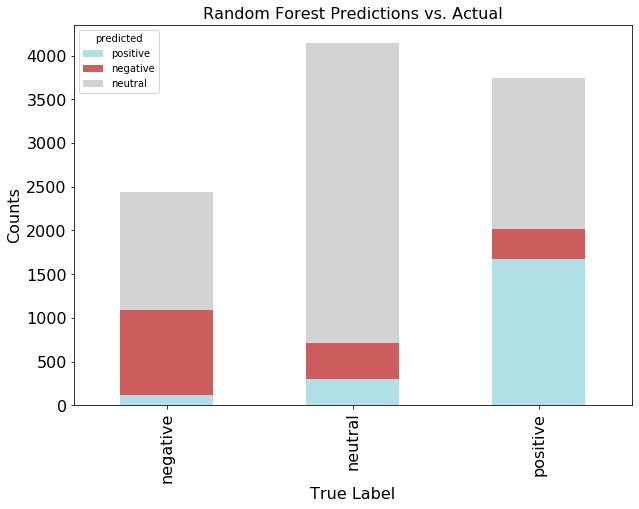

In [133]:
rf_pivot.loc[:,['positive','negative', 'neutral']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('Random Forest Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('RF_predictions.jpeg')
;

''

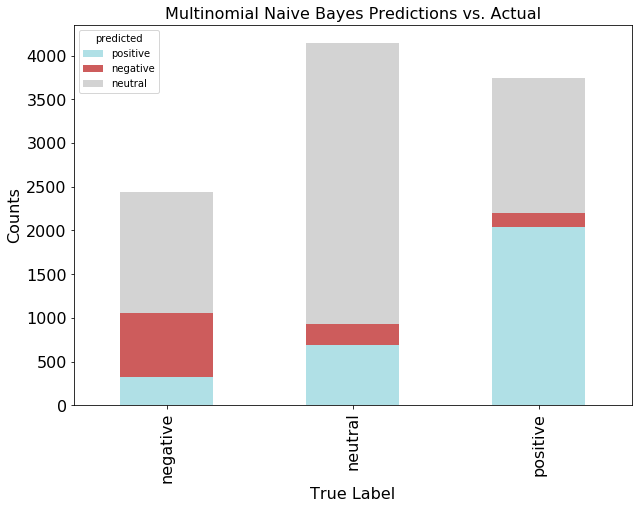

In [134]:
mnb_pivot.loc[:,['positive','negative', 'neutral']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('Multinomial Naive Bayes Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('MNB_predictions.jpeg')
;

''

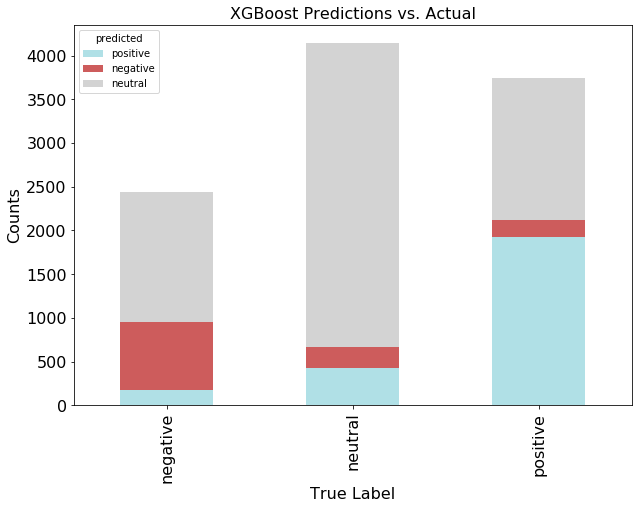

In [135]:
xb_pivot.loc[:,['positive','negative', 'neutral']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('XGBoost Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('XGB_predictions.jpeg')
;

In [136]:
mnb_pct = mnb_pivot
mnb_pct['total'] = mnb_pct['negative'] + mnb_pct['positive'] + mnb_pct['neutral']
mnb_pct['negative_pred'] = mnb_pct['negative']/mnb_pct['total'] * 100
mnb_pct['positive_pred'] = mnb_pct['positive']/mnb_pct['total'] * 100
mnb_pct['neutral_pred'] = mnb_pct['neutral']/mnb_pct['total'] * 100
mnb_pct

predicted,negative,neutral,positive,total,negative_pred,positive_pred,neutral_pred
true,,,,,,,
negative,726,1387,327,2440,29.754098,13.401639,56.844262
neutral,247,3208,688,4143,5.961863,16.606324,77.431813
positive,162,1541,2040,3743,4.328079,54.501737,41.170184


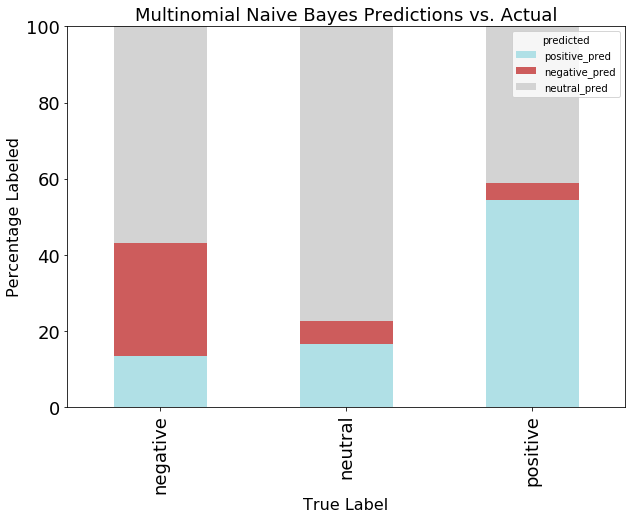

In [137]:
mnb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('Multinomial Naive Bayes Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('MNB_predictions_pct.jpeg')
plt.ylim(0, 100);

In [138]:
rf_pct = rf_pivot
rf_pct['total'] = rf_pct['negative'] + rf_pct['positive'] + rf_pct['neutral']
rf_pct['negative_pred'] = rf_pct['negative']/rf_pct['total'] * 100
rf_pct['positive_pred'] = rf_pct['positive']/rf_pct['total'] * 100
rf_pct['neutral_pred'] = rf_pct['neutral']/rf_pct['total'] * 100
rf_pct

predicted,negative,neutral,positive,total,negative_pred,positive_pred,neutral_pred
true,,,,,,,
negative,973,1346,121,2440,39.877049,4.959016,55.163934
neutral,407,3430,306,4143,9.823799,7.385952,82.790249
positive,348,1721,1674,3743,9.297355,44.723484,45.979161


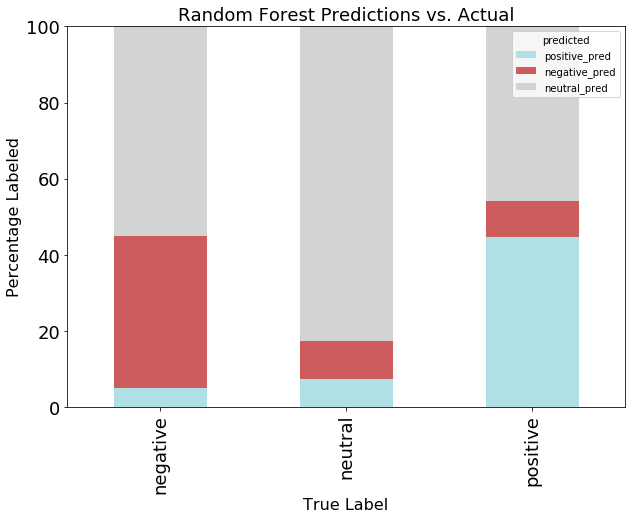

In [139]:
rf_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('Random Forest Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('RF_predictions_pct.jpeg')
plt.ylim(0, 100);

In [256]:
xb_pct = xb_pivot
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100
xb_pct

predicted,negative,neutral,positive,total,negative_pred,positive_pred,neutral_pred
true,,,,,,,
negative,775,1484,181,2440,31.762295,7.418033,60.819672
neutral,244,3473,426,4143,5.889452,10.282404,83.828144
positive,194,1628,1921,3743,5.183008,51.322469,43.494523


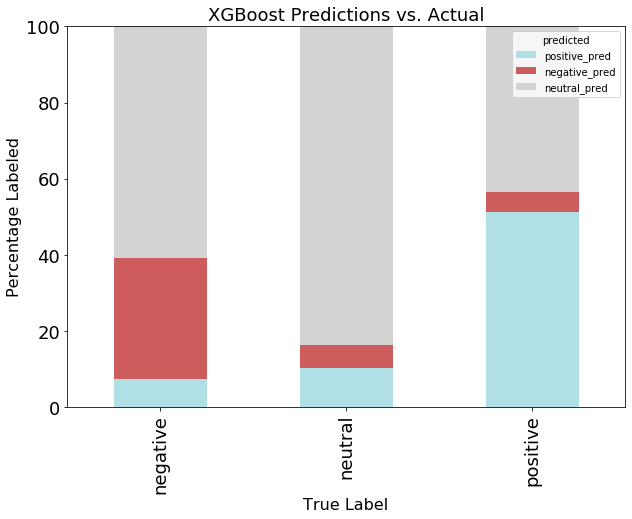

In [257]:
xb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('../images/XGB_predictions_pct.jpeg')
plt.ylim(0, 100);

## Comparing Across Models

In [276]:
comp = pd.read_csv('model_comparison.csv')

In [279]:
comp[1:]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,MNB,0.64,0.52,0.67,0.61,0.3,0.77,0.55,0.54,0.41,0.62,0.6,0.54,0.58
2,XGB,0.64,0.53,0.76,0.64,0.32,0.84,0.51,0.56,0.42,0.65,0.61,0.56,0.6
3,RF,0.56,0.53,0.8,0.63,0.4,0.83,0.45,0.56,0.46,0.64,0.57,0.56,0.59
4,NN,0.53,0.6,0.47,0.53,0.62,0.55,0.39,0.52,0.57,0.57,0.43,0.52,0.54


In [280]:
#Import model comparison statistics from csv

new_header = comp.iloc[0] #grab the first row for the header
comp = comp[1:] #take the data less the header row
comp.columns = new_header
comp.columns = ['Model',  'Negative Precision',   'Neutral Precision',
        'Positive Precision', 'Macro-avg Precision',     'Negative Recall',
            'Neutral Recall',     'Positive Recall',    'Macro-avg Recall',
         'Negative F1-Score',    'Neutral F1-Score',   'Positive F1-Score',
        'Macro-avg F1-Score',        'Avg Accuracy']
comp.head()


,Model,Negative Precision,Neutral Precision,Positive Precision,Macro-avg Precision,Negative Recall,Neutral Recall,Positive Recall,Macro-avg Recall,Negative F1-Score,Neutral F1-Score,Positive F1-Score,Macro-avg F1-Score,Avg Accuracy
1,MNB,0.64,0.52,0.67,0.61,0.3,0.77,0.55,0.54,0.41,0.62,0.6,0.54,0.58
2,XGB,0.64,0.53,0.76,0.64,0.32,0.84,0.51,0.56,0.42,0.65,0.61,0.56,0.6
3,RF,0.56,0.53,0.8,0.63,0.4,0.83,0.45,0.56,0.46,0.64,0.57,0.56,0.59
4,NN,0.53,0.6,0.47,0.53,0.62,0.55,0.39,0.52,0.57,0.57,0.43,0.52,0.54


In [295]:
float_cols = ['Negative Precision',   'Neutral Precision',
        'Positive Precision', 'Macro-avg Precision',     'Negative Recall',
            'Neutral Recall',     'Positive Recall',    'Macro-avg Recall',
         'Negative F1-Score',    'Neutral F1-Score',   'Positive F1-Score',
        'Macro-avg F1-Score',        'Avg Accuracy']
comp[float_cols] = comp[float_cols].astype(float)


/Users/jamiewessels/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [296]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 1 to 4
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model                4 non-null      object 
 1   Negative Precision   4 non-null      float64
 2   Neutral Precision    4 non-null      float64
 3   Positive Precision   4 non-null      float64
 4   Macro-avg Precision  4 non-null      float64
 5   Negative Recall      4 non-null      float64
 6   Neutral Recall       4 non-null      float64
 7   Positive Recall      4 non-null      float64
 8   Macro-avg Recall     4 non-null      float64
 9   Negative F1-Score    4 non-null      float64
 10  Neutral F1-Score     4 non-null      float64
 11  Positive F1-Score    4 non-null      float64
 12  Macro-avg F1-Score   4 non-null      float64
 13  Avg Accuracy         4 non-null      float64
dtypes: float64(13), object(1)
memory usage: 580.0+ bytes


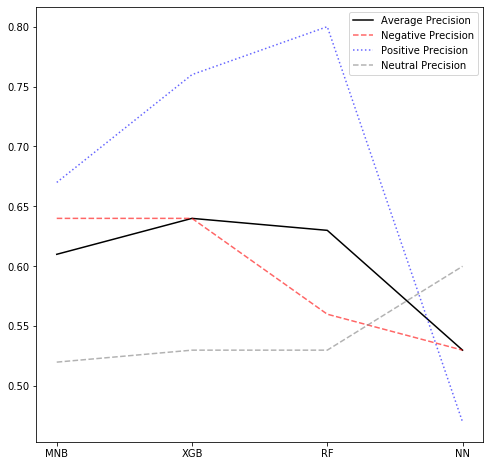

In [323]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(comp['Model'], comp['Macro-avg Precision'], color = 'black', label = 'Average Precision')
# ax.scatter(comp['Model'], comp['Macro-avg Precision'], color = 'black', label = 'Average Precision')
ax.plot(comp['Model'], comp['Negative Precision'], color = 'red', label = 'Negative Precision', alpha = 0.6, linestyle='dashed')
ax.plot(comp['Model'], comp['Positive Precision'], color = 'blue', label = 'Positive Precision', alpha = 0.6, linestyle='dotted')
ax.plot(comp['Model'], comp['Neutral Precision'], color = 'gray', label = 'Neutral Precision', alpha = 0.6, linestyle='--')

ax.legend()
# ax.plot(comp['Model'], comp['Macro-avg Precision'], color = 'red', label = 'Average Precision')
# ax.scatter(comp['Model'], comp['Macro-avg Precision'], color = 'blue', label = 'Average Precision')

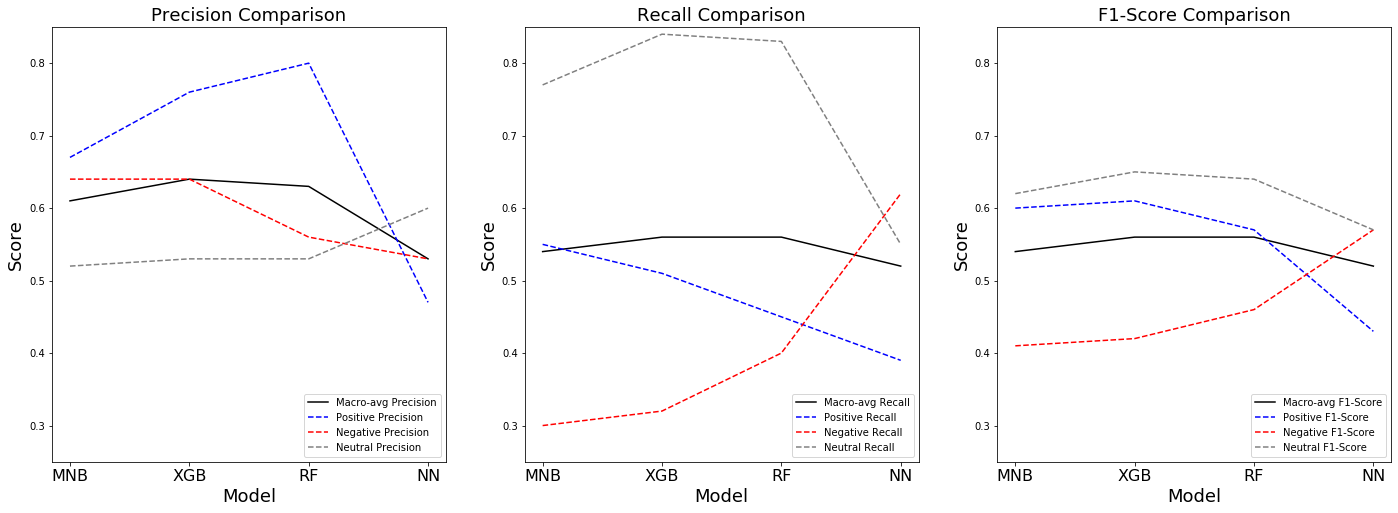

In [322]:
groups = ['Macro-avg', 'Positive', 'Negative', 'Neutral']
metrics = ['Precision', 'Recall', 'F1-Score']
colors = ['black', 'blue', 'red', 'gray']
linestyles = ['solid', 'dashed', 'dashed', 'dashed']
titles = ['Precision Comparison', 'Recall Comparison', 'F1-Score Comparison']

fig, axs = plt.subplots(1,3, figsize = (24,8))


for ax, met, title in zip(axs.flatten(), metrics, titles):
    for gr, col, ls in zip(groups, colors, linestyles): 
        ax.plot(comp['Model'], comp[f'{gr} {met}'], color = col, label = f'{gr} {met}', linestyle = ls)
        ax.legend(loc = 4)
        ax.set_xticklabels(comp['Model'],fontsize = 16)
    ax.set_title(title , fontsize = 18)
    ax.set_ylim(0.25,0.85)
    ax.set_xlabel('Model', fontsize = 18)
    ax.set_ylabel('Score', fontsize = 18)

fig.savefig('../images/Model_comparison.jpeg')

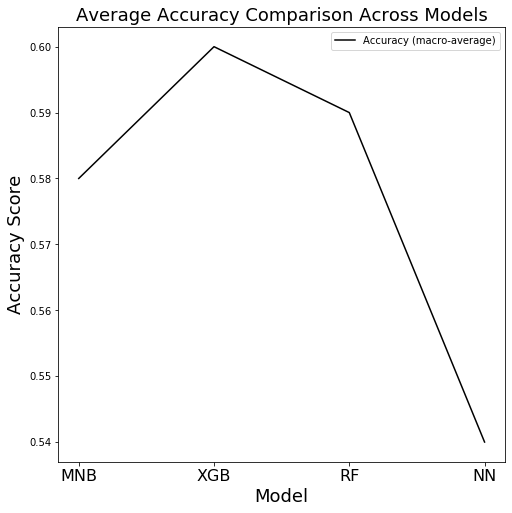

In [326]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(comp['Model'], comp['Avg Accuracy'], color = 'black', label = 'Accuracy (macro-average)')
ax.set_xticklabels(comp['Model'],fontsize = 16)
ax.set_title('Average Accuracy Comparison Across Models' , fontsize = 18)
ax.set_xlabel('Model', fontsize = 18)
ax.set_ylabel('Accuracy Score', fontsize = 18)

ax.legend()
fig.savefig('../images/Accuracy_comparison.jpeg');


## Looking at Threshold

Observation: XGBoost does really gooda t predicting neutral correctly and okay at predicting positive.  But a lot of the true negatives are labeled as neutral.  A good amount of the ture positives are also labeled as neutral.

Random forest has same issue but is better at detecting true negatives than other models.


In [142]:
xb_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.226322,0.505421,0.268257,neutral,positive
1,0.274279,0.400620,0.325100,neutral,neutral
2,0.513098,0.314716,0.172186,negative,negative
3,0.266493,0.455938,0.277569,neutral,negative
4,0.226322,0.505421,0.268257,neutral,positive


In [144]:
#Look at true negatives

xb_tn = xb_predictions[xb_predictions['true']=='negative']
xb_tn.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
2,0.513098,0.314716,0.172186,negative,negative
3,0.266493,0.455938,0.277569,neutral,negative
5,0.093666,0.079968,0.826366,positive,negative
7,0.838162,0.098476,0.063363,negative,negative
10,0.328584,0.421063,0.250354,neutral,negative


In [162]:
colors2 = ['indianred', 'lightgrey', 'powderblue' ]

In [163]:
num_array = LabelEncoder().fit_transform(xb_tn['predicted'])
color_preds = np.array(colors2)[num_array]

''

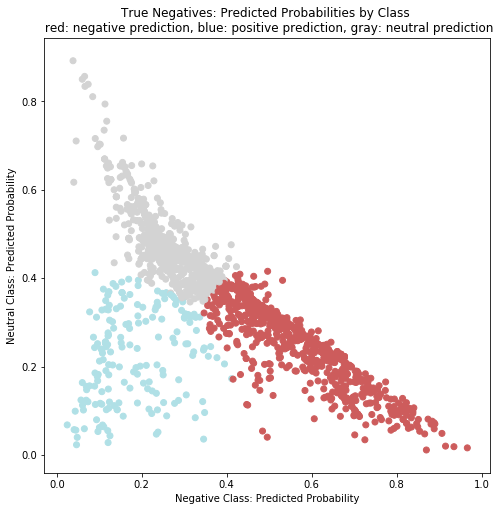

In [208]:
#Plot shows True Negatives
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(xb_tn['negative_prob'], xb_tn['neutral_prob'], color = color_preds)
ax.set_title('True Negatives: Predicted Probabilities by Class \n red: negative prediction, blue: positive prediction, gray: neutral prediction')
ax.set_xlabel('Negative Class: Predicted Probability')
ax.set_ylabel('Neutral Class: Predicted Probability')
fig.savefig('../images/True_negatives.jpeg')
;


What would happen if we set a threshold for negative class if probability was higher than 0.2? 

In [176]:
xb_neg_thresh = xb_predictions

In [180]:
xb_neg_thresh['adj_pred'] = np.where(xb_neg_thresh['negative_prob']>0.25, 'negative', xb_neg_thresh['predicted'])

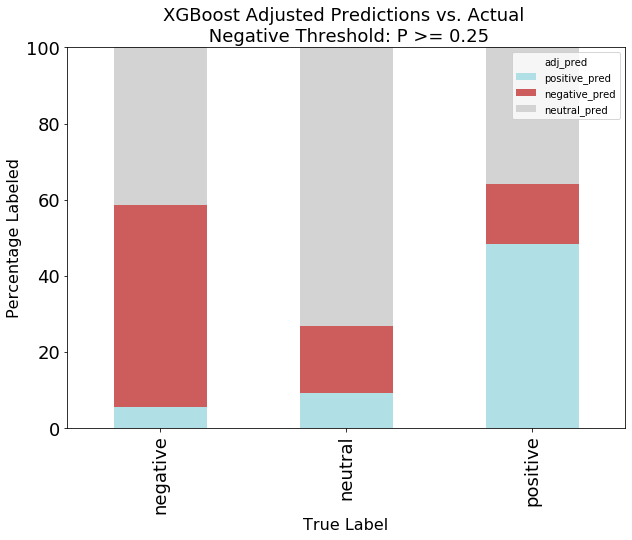

In [252]:
xb_adj_counts = xb_neg_thresh.groupby(['true', 'adj_pred']).size().reset_index()
xb_pivot_adj = xb_adj_counts.pivot(index='true', columns='adj_pred', values=0)

xb_pct = xb_pivot_adj
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100


xb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Adjusted Predictions vs. Actual \n Negative Threshold: P >= 0.25', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('../images/XGB_predictions_adjusted.jpeg')
plt.ylim(0, 100);

#What if we Lowered the threshold for calling something neutral? 


''

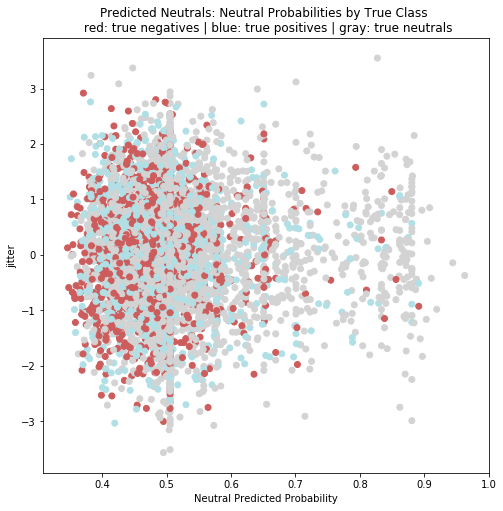

In [210]:
#data of everything labeled neutral
xb_neut_label = xb_predictions[xb_predictions['predicted']=='neutral']

num_array = LabelEncoder().fit_transform(xb_neut_label['true'])
color_true = np.array(colors2)[num_array]


#Plot shows Predicted Neutrals.  Colors represent true values

jitter =np.random.normal(size = len(num_array))

fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(xb_neut_label['neutral_prob'], jitter, color = color_true)
ax.set_title('Predicted Neutrals: Neutral Probabilities by True Class \n red: true negatives | blue: true positives | gray: true neutrals')
ax.set_xlabel('Neutral Predicted Probability')
ax.set_ylabel('jitter')
fig.savefig('../images/predicted_neutrals.jpeg')
;

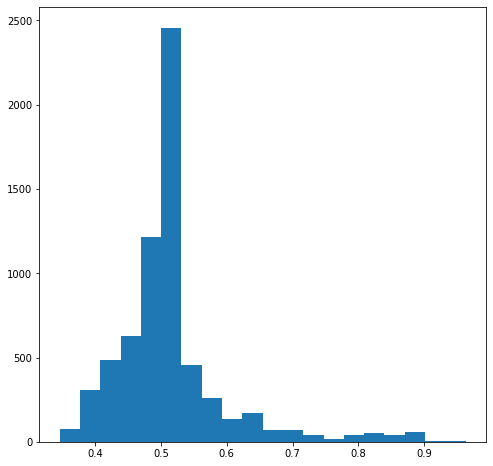

In [231]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.hist(xb_neut_label['neutral_prob'], bins = 20);

What if we only predict neutral if the neutral predicted probability is above 0.45? 

In [249]:
neut_thresh = xb_predictions


p_or_n = np.where(neut_thresh['negative_prob']>neut_thresh['positive_prob'], 'negative', 'positive')

neut_thresh['p_or_n'] = p_or_n

neut_thresh['neut_wt_pred'] = np.where(neut_thresh['neutral_prob']<0.40, p_or_n, xb_neg_thresh['adj_pred'])
neut_thresh = neut_thresh.drop(columns = ['p_or_n'])

neut_thresh

,negative_prob,neutral_prob,positive_prob,predicted,true,adj_pred,neut_wt_pred
0,0.226322,0.505421,0.268257,neutral,positive,neutral,neutral
1,0.274279,0.400620,0.325100,neutral,neutral,negative,negative
2,0.513098,0.314716,0.172186,negative,negative,negative,negative
3,0.266493,0.455938,0.277569,neutral,negative,negative,negative
4,0.226322,0.505421,0.268257,neutral,positive,neutral,neutral
...,...,...,...,...,...,...,...
10321,0.302754,0.334079,0.363167,positive,neutral,negative,positive
10322,0.226322,0.505421,0.268257,neutral,neutral,neutral,neutral
10323,0.226322,0.505421,0.268257,neutral,positive,neutral,neutral
10324,0.226322,0.505421,0.268257,neutral,neutral,neutral,neutral


In [253]:
neut_wt_counts = neut_thresh.groupby(['true', 'neut_wt_pred']).size().reset_index()
xb_pivot_neut = neut_wt_counts.pivot(index='true', columns='neut_wt_pred', values=0)


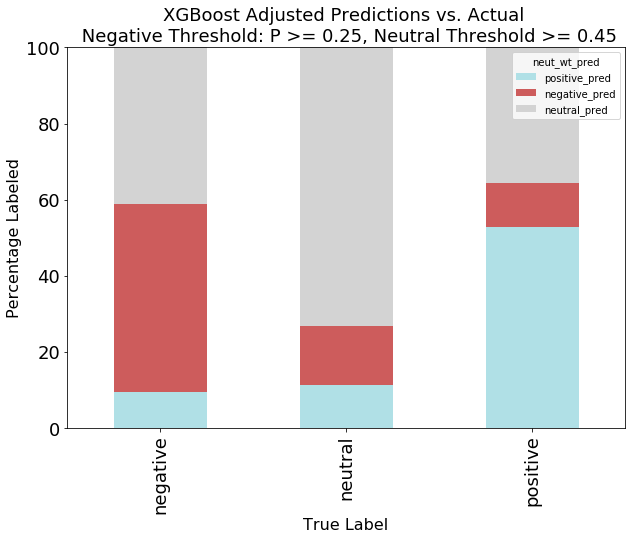

In [254]:
neut_wt_counts = neut_thresh.groupby(['true', 'neut_wt_pred']).size().reset_index()
xb_pivot_neut = neut_wt_counts.pivot(index='true', columns='neut_wt_pred', values=0)

xb_pct = xb_pivot_neut
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100


xb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Adjusted Predictions vs. Actual \n Negative Threshold: P >= 0.25, Neutral Threshold >= 0.45', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('../images/XGB_predictions_adjusted_neutral_weight.jpeg')
plt.ylim(0, 100);